## SPAM SMS DETECTION

<!--By JIBIN K-->

Task:

Build an AI model that can classify SMS messages as spam or legitimate. Use techniques like TF-IDF or word embeddings with classifiers like Naive Bayes, Logistic Regression, or Support Vector Machines to identify spam messages. 

## Install the necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score, roc_curve, roc_auc_score

## Load the dataset

In [2]:
file_path = r"D:\CodSoft\CODSOFT\Task 4\spam.csv"
data = pd.read_csv("spam.csv", encoding='latin-1')[['v1', 'v2']]
data.columns = ['label', 'text']

## Inspect the data

In [3]:
print("Data shape:", data.shape)
print("---"*30)
print("Dataset variables:", data.columns.to_list())
print("---"*30)
print("Data info: \n"); print(data.info())
print("---"*30)
print("Data description:\n", data.describe(include='all').T)
print("---"*30)
print("Data head:\n", data.head())
print("---"*30)
print("Data tail:\n", data.tail())

Data shape: (5572, 2)
------------------------------------------------------------------------------------------
Dataset variables: ['label', 'text']
------------------------------------------------------------------------------------------
Data info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None
------------------------------------------------------------------------------------------
Data description:
       count unique                     top  freq
label  5572      2                     ham  4825
text   5572   5169  Sorry, I'll call later    30
------------------------------------------------------------------------------------------
Data head:
   label                                               text
0   ham  Go until jurong point,

In [4]:
# Checking for missing values
data.isnull().sum()

label    0
text     0
dtype: int64

- No missing values

## Data Cleaning and Preprocessing

In [5]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text) 
    text = text.translate(str.maketrans('', '', string.punctuation)) 
    text = text.strip()
    return text

data['clean_text'] = data['text'].apply(clean_text)
data['label_num'] = data['label'].map({'ham': 0, 'spam': 1})

- Cleaned the text data by removing numbers, punctuation, and converting text to lowercase.
- Mapped labels ('ham' to 0, 'spam' to 1) for easy model processing.

In [6]:
data.head()

,label,text,clean_text,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,0
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in a wkly comp to win fa cup final...,1
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,0


## TF-IDF Vectorization and Feature & Target selection

In [7]:
tfidf = TfidfVectorizer(stop_words='english')
X = tfidf.fit_transform(data['clean_text'])
y = data['label_num']

## Train-Test Split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"X train shape: {X_train.shape}\nX test shape: {X_test.shape}\ny tarin shpae: {y_train.shape}\ny test shepe: {y_test.shape}")

X train shape: (4457, 8295)
X test shape: (1115, 8295)
y tarin shpae: (4457,)
y test shepe: (1115,)


## Model Training and Evaluation

### Naive Bayes

In [9]:
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
print("Naive Bayes:\n", classification_report(y_test, y_pred_nb))

Naive Bayes:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.77      0.87       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.93      1115
weighted avg       0.97      0.97      0.97      1115



### Logistic Regression

In [10]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Logistic Regression:\n", classification_report(y_test, y_pred_lr))

Logistic Regression:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       965
           1       0.97      0.61      0.75       150

    accuracy                           0.94      1115
   macro avg       0.96      0.80      0.86      1115
weighted avg       0.95      0.94      0.94      1115



### Support Vector Machine (SVM)

In [11]:
svm = LinearSVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("SVM:\n", classification_report(y_test, y_pred_svm))

SVM:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       965
           1       0.97      0.83      0.90       150

    accuracy                           0.97      1115
   macro avg       0.97      0.91      0.94      1115
weighted avg       0.97      0.97      0.97      1115



### ROC Curve Plot

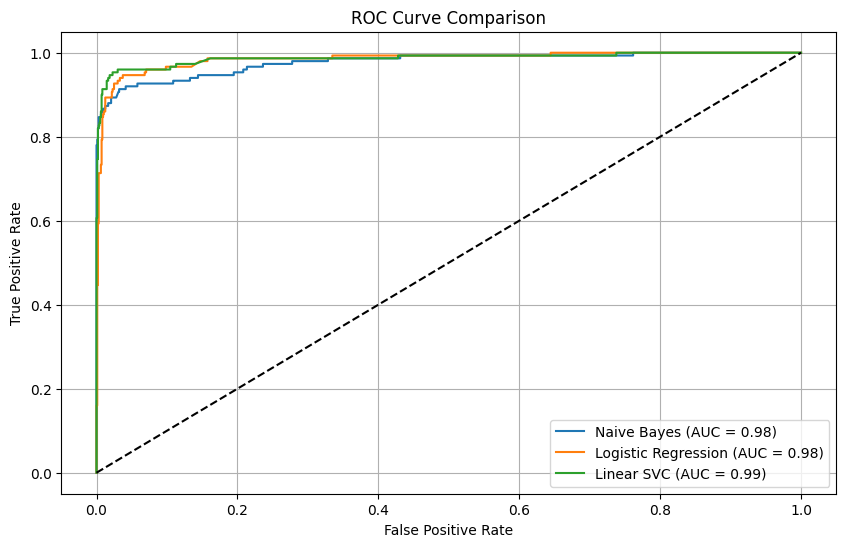

In [12]:
# Prepare model-prediction pairs
models = {
    "Naive Bayes": (nb, nb.predict_proba(X_test)[:, 1]),
    "Logistic Regression": (lr, lr.predict_proba(X_test)[:, 1]),
    "Linear SVC": (svm, svm.decision_function(X_test))  # no predict_proba, use decision_function
}

# Plot ROC curves
plt.figure(figsize=(10, 6))
for name, (model, probs) in models.items():
    fpr, tpr, _ = roc_curve(y_test, probs)
    auc_score = roc_auc_score(y_test, probs)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.2f})")

# Plot baseline
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid(True)
plt.show()

- Linear SVC provided the highest AUC score, indicating strong predictive performance for spam detection.
- Logistic Regression performed well, providing a good balance between precision and recall.
- Naive Bayes was a strong baseline model but didn't outperform the other two models in terms of AUC.